In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pip install scikit-learn==1.3.2

In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


In [4]:
df = pd.read_csv("UCI_Credit_Card.csv")

print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [5]:
#Lets check the number of columns and their names:
columns_list = df.columns.tolist()

print("List of all columns:")
for col in columns_list:
    print(col)

List of all columns:
ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default.payment.next.month


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (30000, 25)


# **EDA** (Exploratory Data Analysis)

In [8]:
# Checking summary statistics for numerical columns with an intention to understand central tendency, dispersion, and distribution
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.

## The overview of summary statistics for each column.

1. **Count**:

- This represents the number of non-null values in each column. For example, in the "ID" column, there are 30,000 non-null values, meaning there are no missing values in this column.

2. **Mean**:

- The mean (average) of the values in each column. For example, the mean of the "LIMIT_BAL" column (credit limit) is approximately 167,484.32.

3. **Std** (Standard Deviation):

- This is a measure of the amount of variation or dispersion in the dataset. It indicates how spread out the values are around the mean. For instance, in the "AGE" column, the standard deviation is approximately 9.22. A higher standard deviation means more spread out data.

4. **Min**:

- The minimum value in each column. For example, the minimum "LIMIT_BAL" is 10,000.

5. **25th Percentile** (Q1):

- Also known as the first quartile, this value indicates the point at which 25% of the data falls below it. For example, the 25th percentile of "AGE" is 28, meaning 25% of individuals in the dataset are 28 years old or younger.

6. **50th Percentile** (Median) (Q2):

- The median is the middle value in the dataset when it is ordered from least to greatest. For example, the median "LIMIT_BAL" is 140,000, meaning half of the credit limits are below this value and half are above.

7. **75th Percentile** (Q3):

- This is the point at which 75% of the data falls below it. For example, the 75th percentile of "AGE" is 41, meaning 75% of individuals in the dataset are 41 years old or younger.

8. **Max**:

- The maximum value in each column. For instance, the maximum "LIMIT_BAL" is 1,000,000.

In [9]:
# Checking for Missing values:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


- No missing values in the data.

In [10]:
# Checking for duplicates in the dataset:
num_duplicates_initial = df.duplicated().sum()

if num_duplicates_initial > 0:
    print(f"Number of duplicates in the initial dataset: {num_duplicates_initial}")
    # To get the actual duplicate rows
    duplicate_rows_initial = df[df.duplicated()]
    print("Duplicate rows in the initial dataset:")
    print(duplicate_rows_initial)
else:
    print("No duplicates found in the initial dataset.")

No duplicates found in the initial dataset.


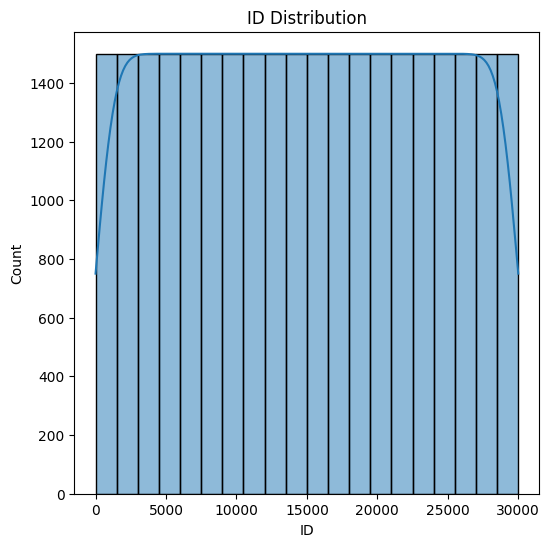

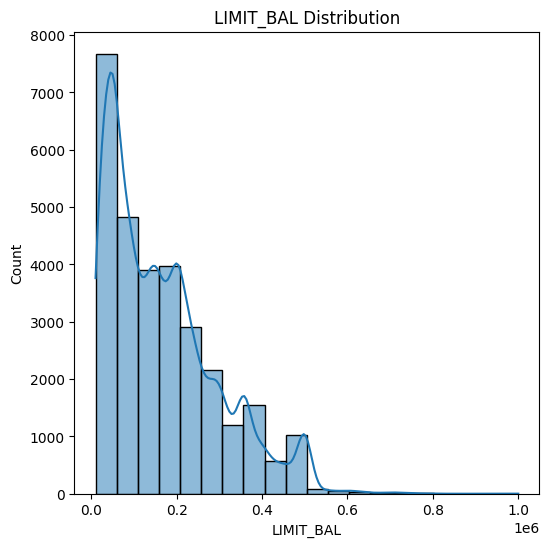

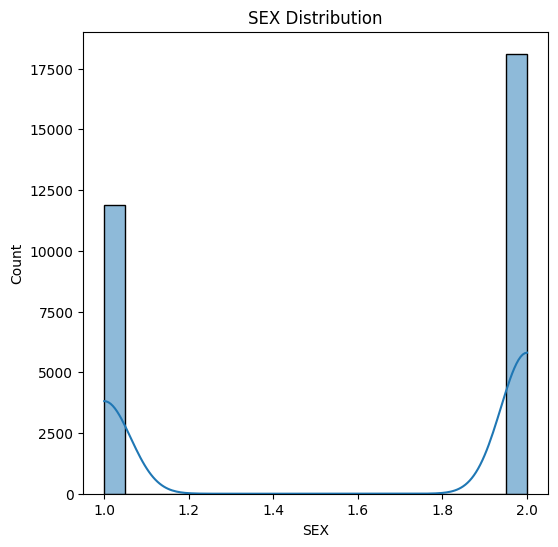

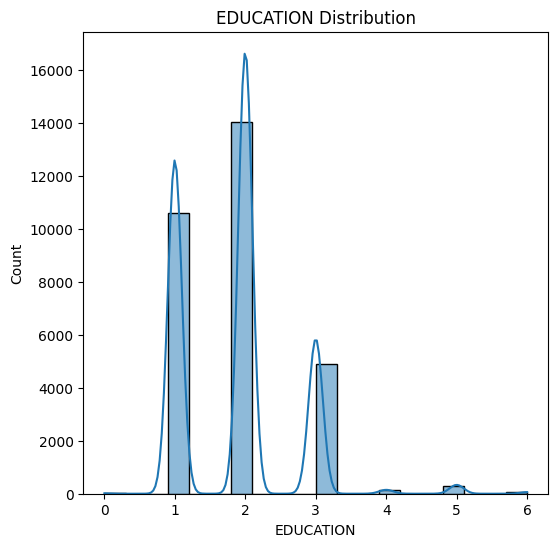

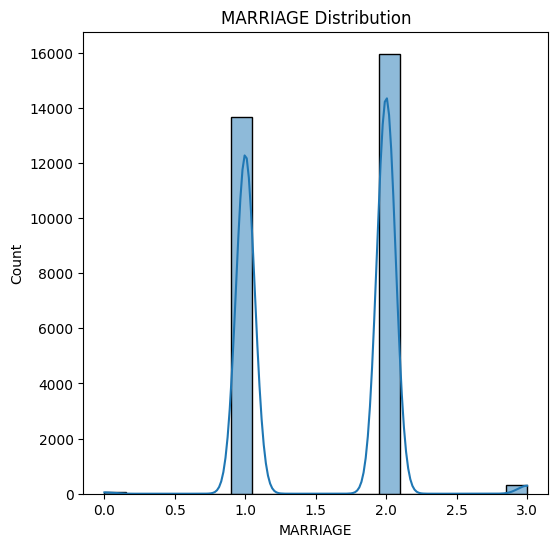

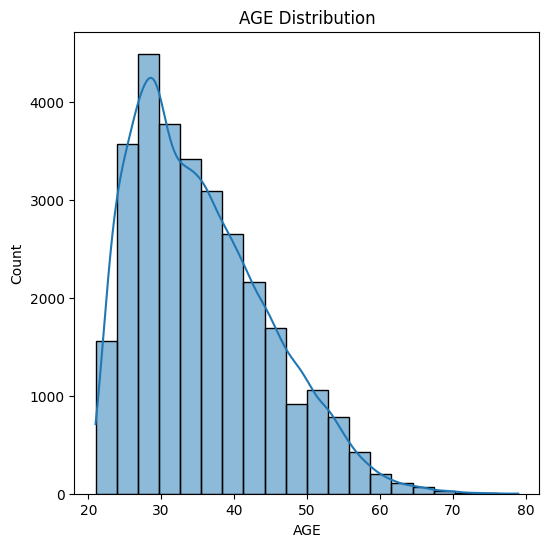

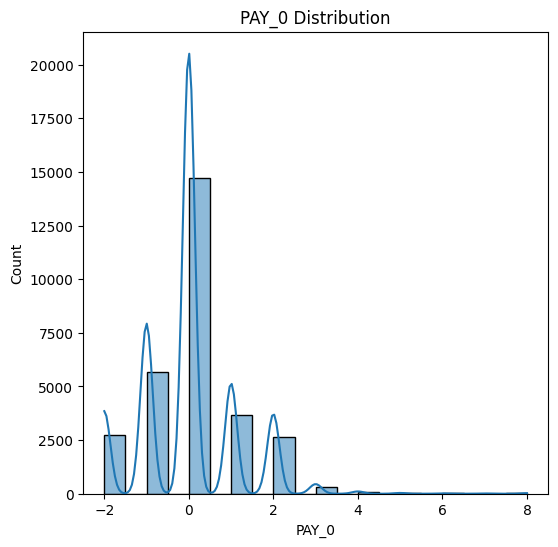

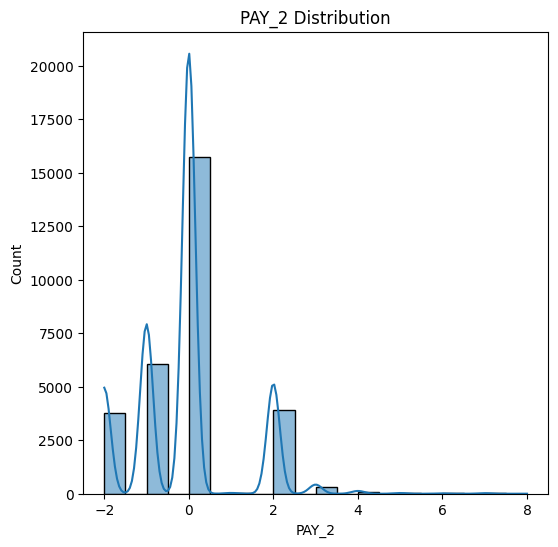

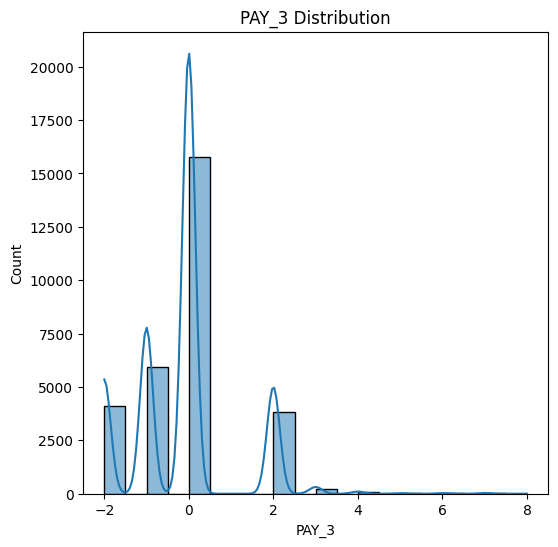

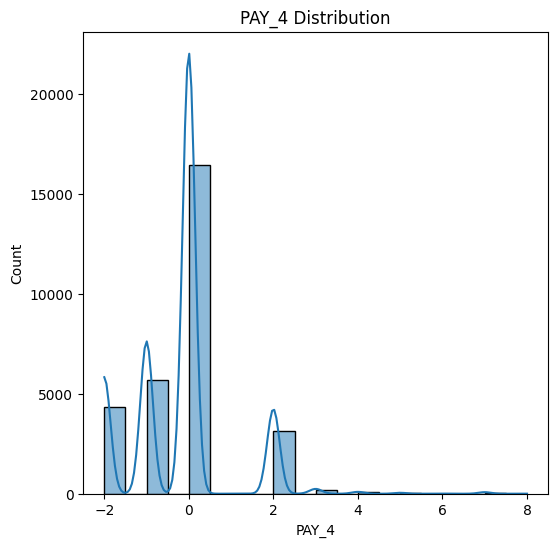

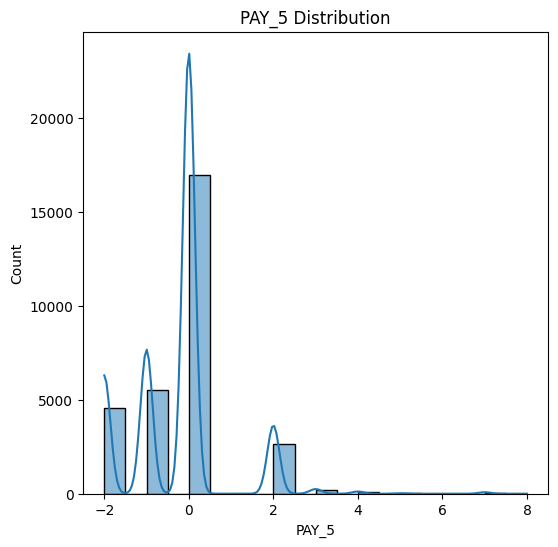

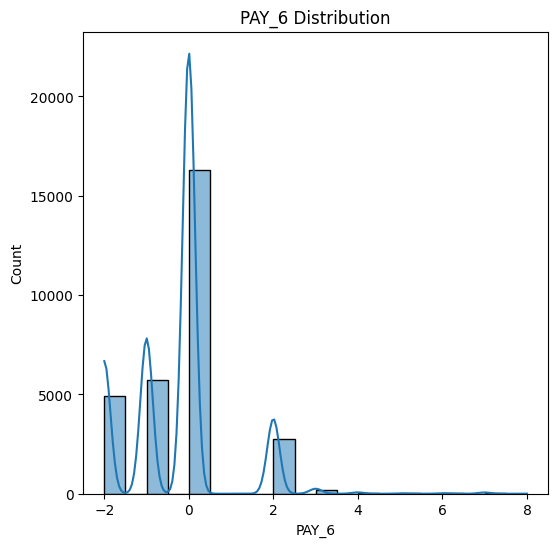

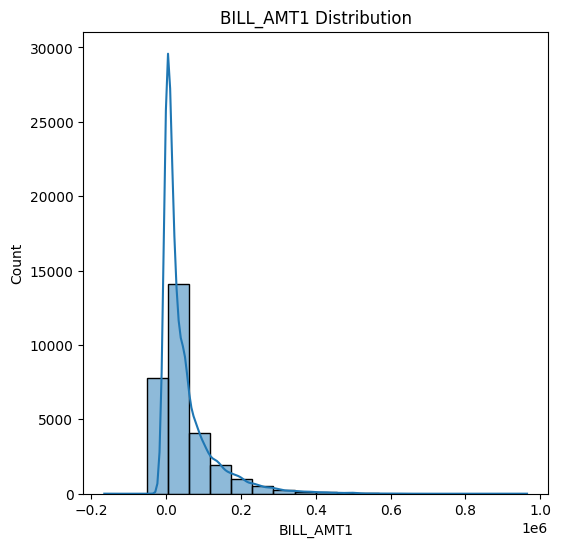

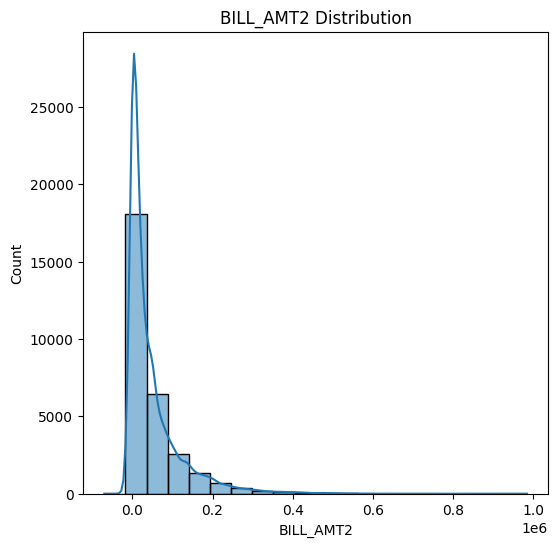

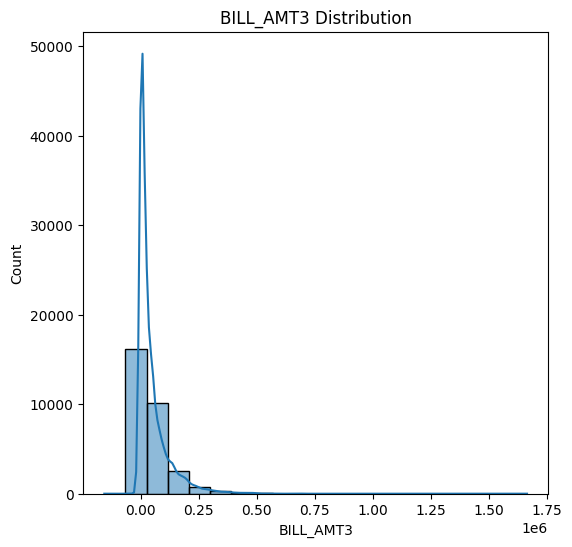

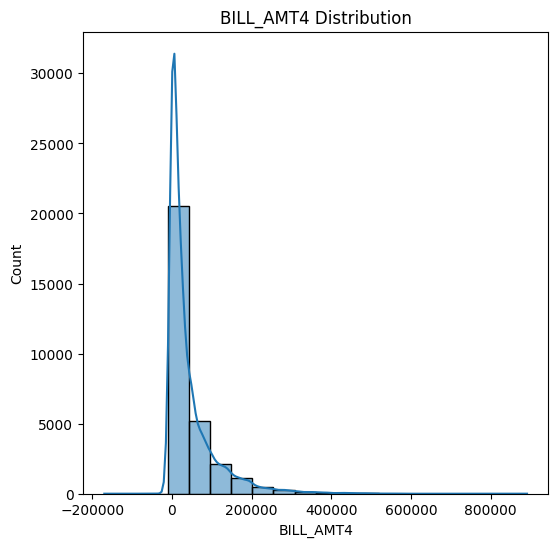

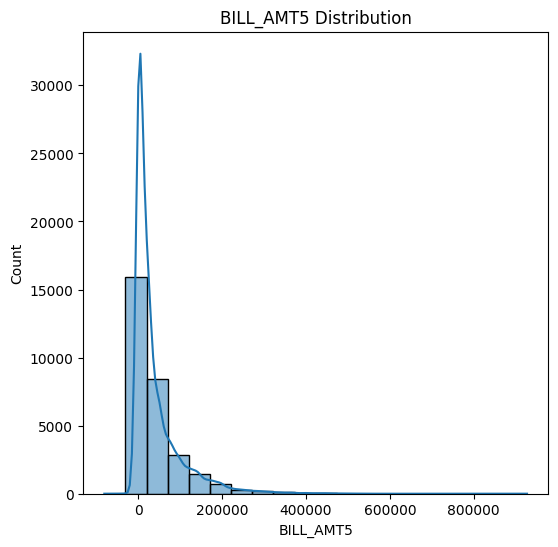

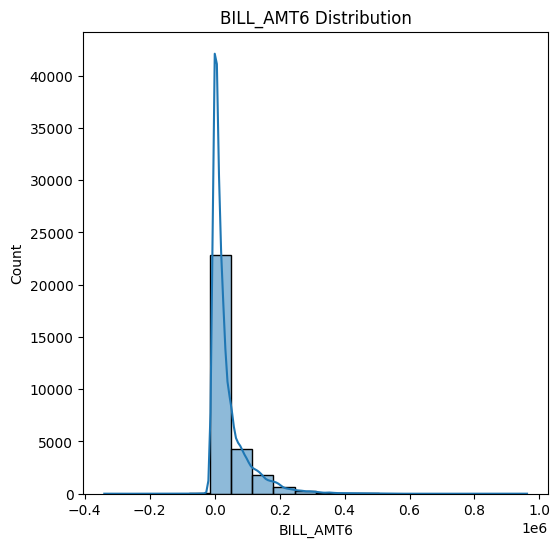

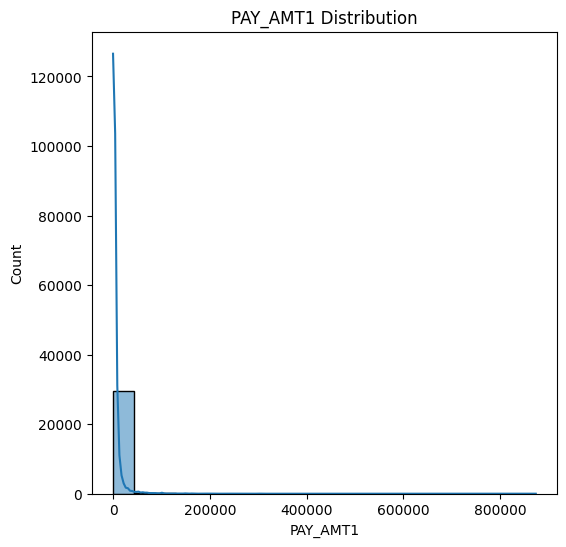

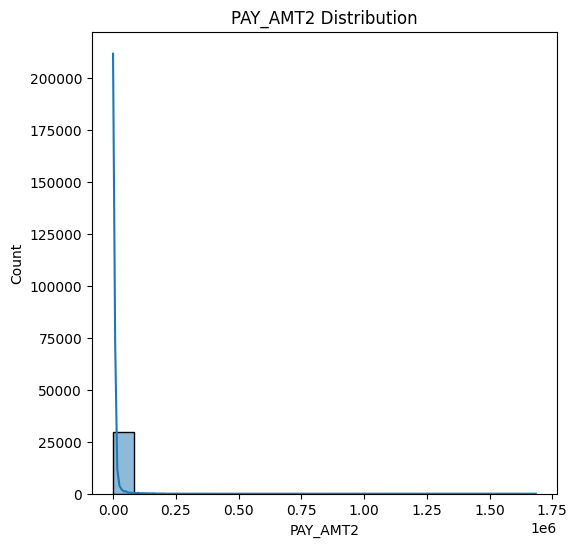

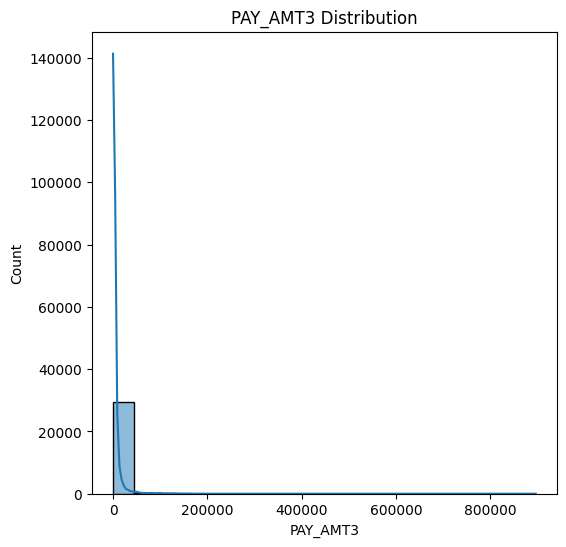

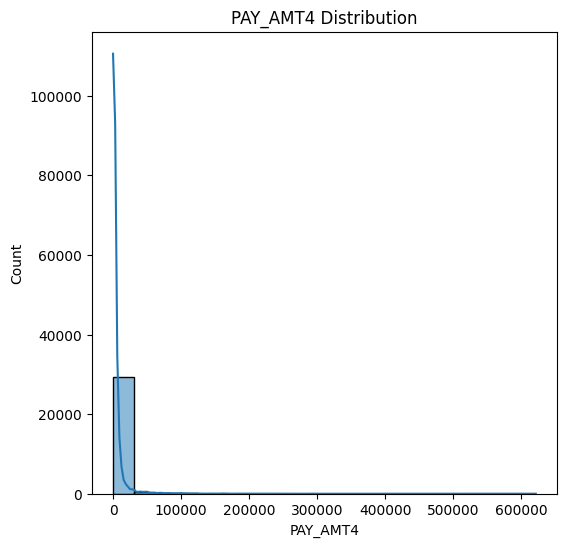

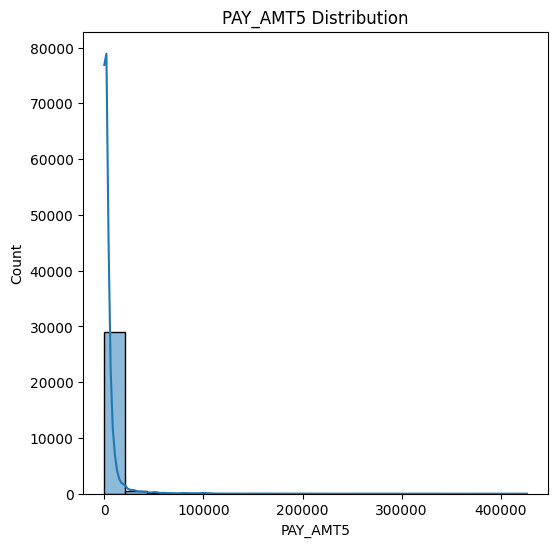

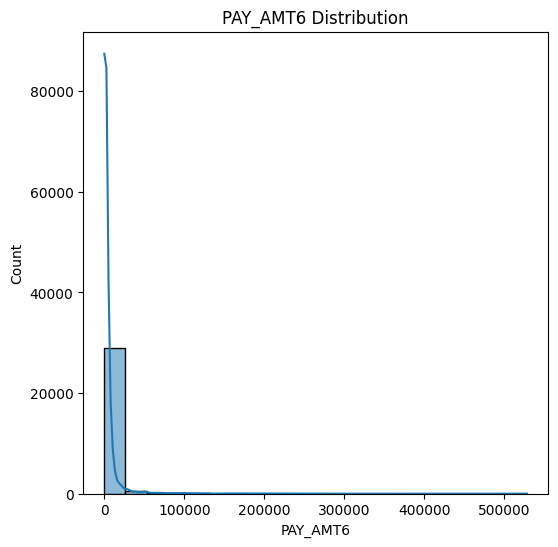

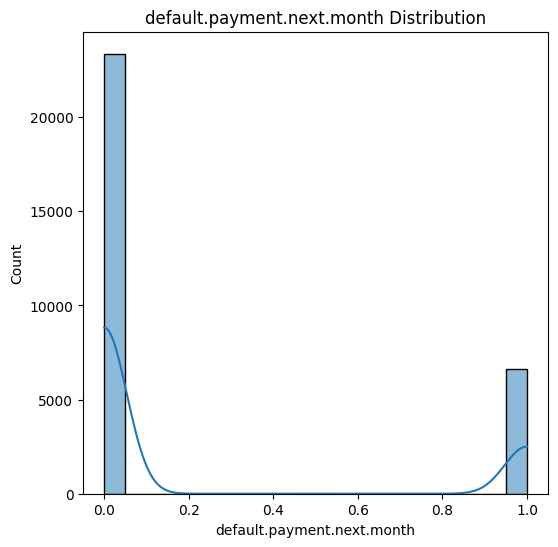

In [11]:
# Plotting histograms to check the distribution of numerical columns just to get a general idea of how the data is distributed.
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col + " Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Correlation Matrix:


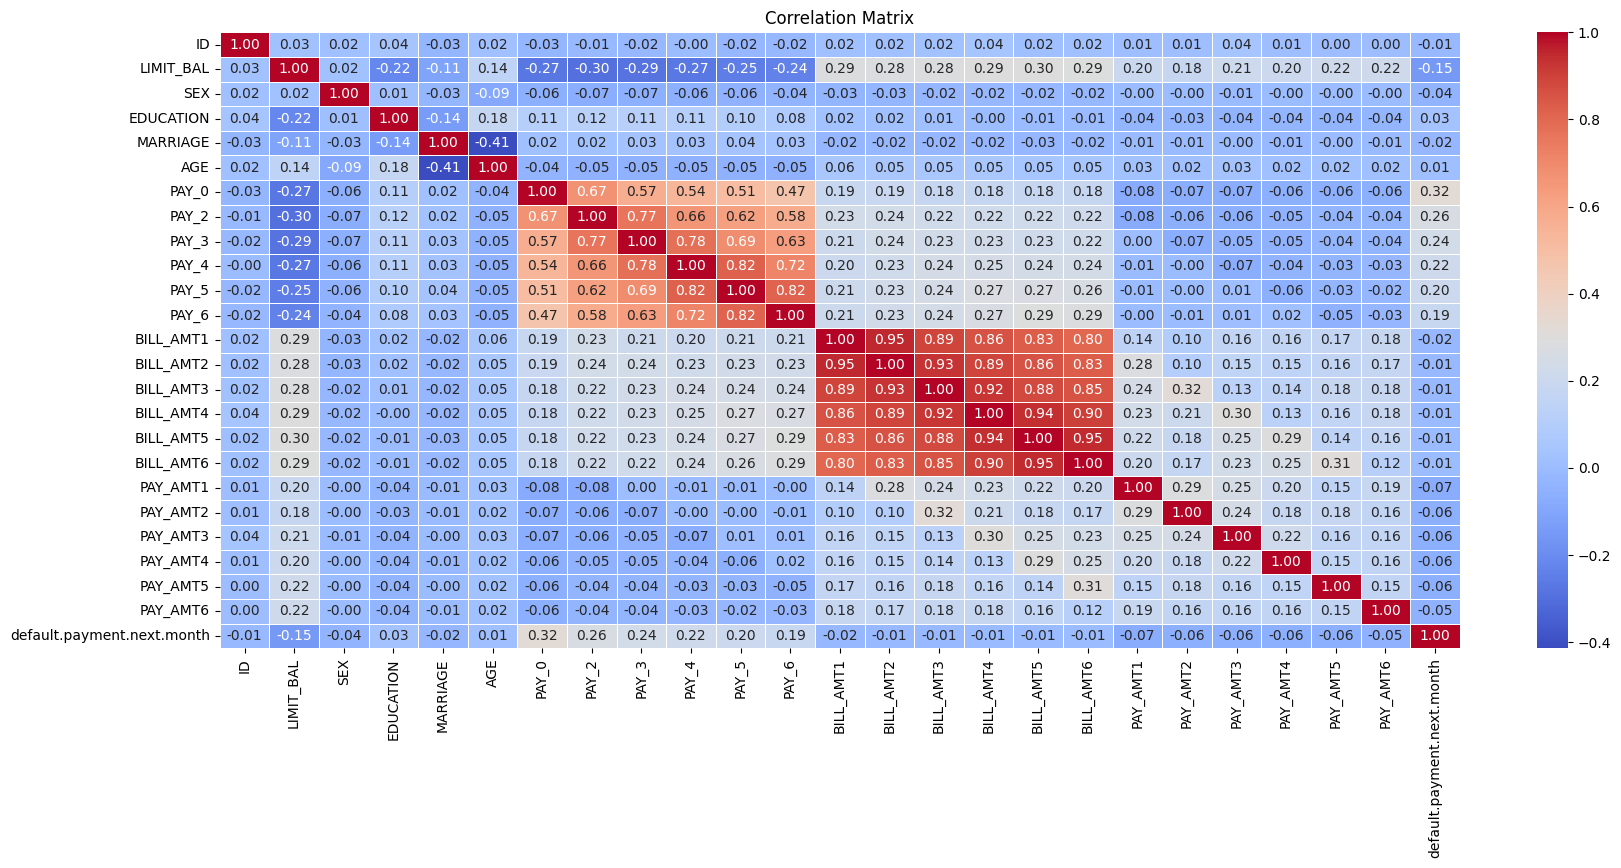

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### This Correlation matrix looks very large and intimidating, so let us break it down into manageable pieces and focus on certain aspects which can make it more understandable.

#### For viewers who may not know how to interpret a correlation matrix:

Understanding Correlation:
- **Correlation Range**: The values in a correlation matrix range from -1 to 1.
- **Positive Correlation** (close to 1): As one variable increases, the other variable tends to also increase.
- **Negative Correlation** (close to -1): As one variable increases, the other variable tends to decrease.
- **No Correlation** (close to 0): There is no linear relationship between the variables.

## Some Observations:

1. There seems to be a positive correlation which gets gradually weaker between the **BILL_AMTs**. This would indicate that if the bill amount for the previous month (BILL_AMT1) was high, the bill amount for the current month (BILL_AMT2) tends to be high as well but slightly less than previous amount.
2. There is a negative correlation between **LIMIT_BAL** and **default.payment.next.month** which may suggest that higher credit limits (LIMIT_BAL) are associated with a lower likelihood of default (default.payment.next.month).
3. **LIMIT_BAL and AGE**: The correlation is 0.14, which indicates a weak positive correlation. As LIMIT_BAL (credit limit) increases, AGE tends to slightly increase.
4. **EDUCATION and MARRIAGE**: The correlation is -0.14, indicating a weak negative correlation. As EDUCATION level increases, MARRIAGE tends to decrease slightly.
5. **PAY_0 and default.payment.next.month**: The correlation is 0.32, which indicates a moderate positive correlation. A higher PAY_0 (repayment status in September) is associated with a higher likelihood of default in the next month.

## **Repayment Status:**
- The "PAY_X" columns indicate the repayment status.
1. X Axis:

- The X axis represents the different categories of repayment status.
These categories typically indicate the number of months of delay in payment:
 **-2**: No consumption
 , **-1**: Paid in full
, **0**: Revolving credit (paid minimum amount) **1, 2, 3, ..., 8**: Number of months of payment delay.

2. Y Axis:

- The Y axis represents the count or frequency of individuals falling into each repayment status category.
It shows how many individuals fall into each category of repayment status

<ipython-input-13-87c3b9a5fb14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


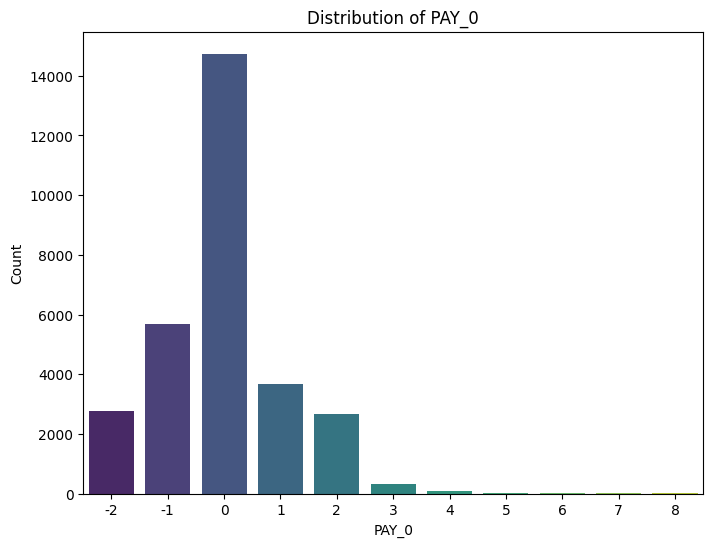

<ipython-input-13-87c3b9a5fb14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


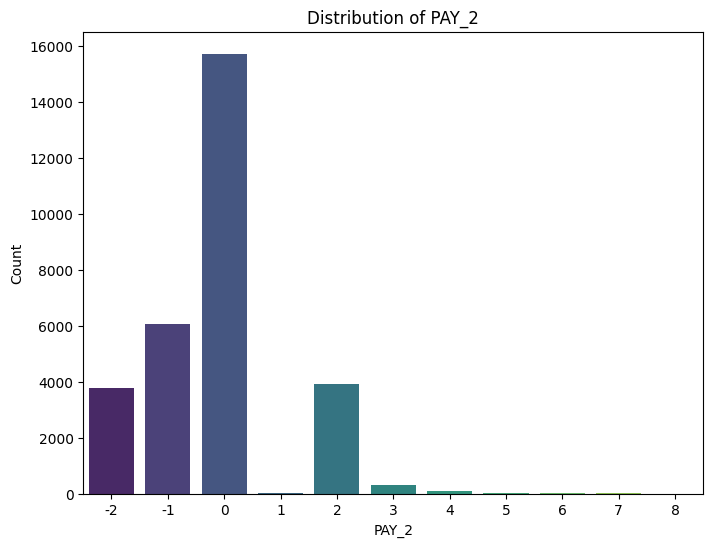

<ipython-input-13-87c3b9a5fb14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


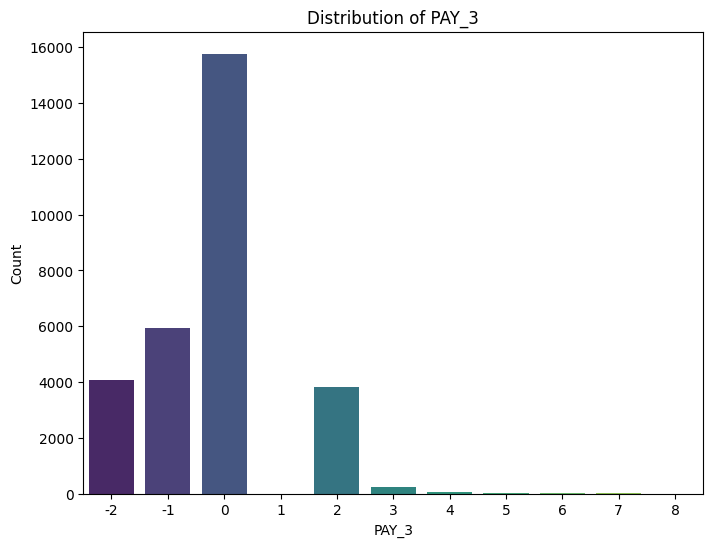

<ipython-input-13-87c3b9a5fb14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


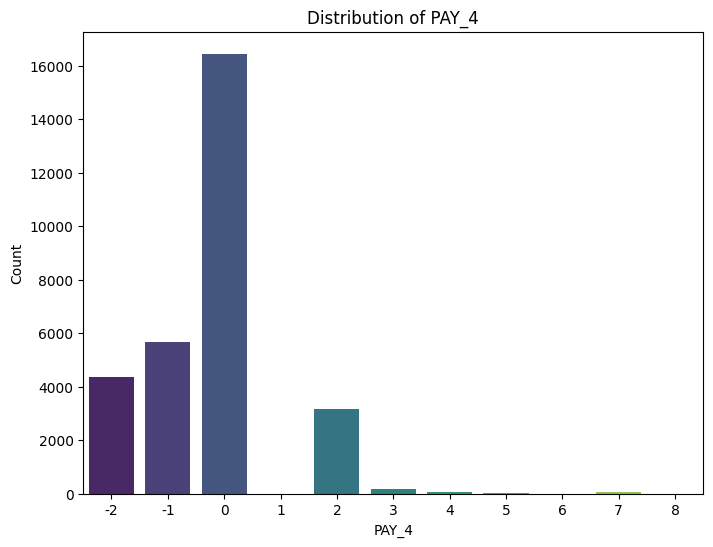

<ipython-input-13-87c3b9a5fb14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


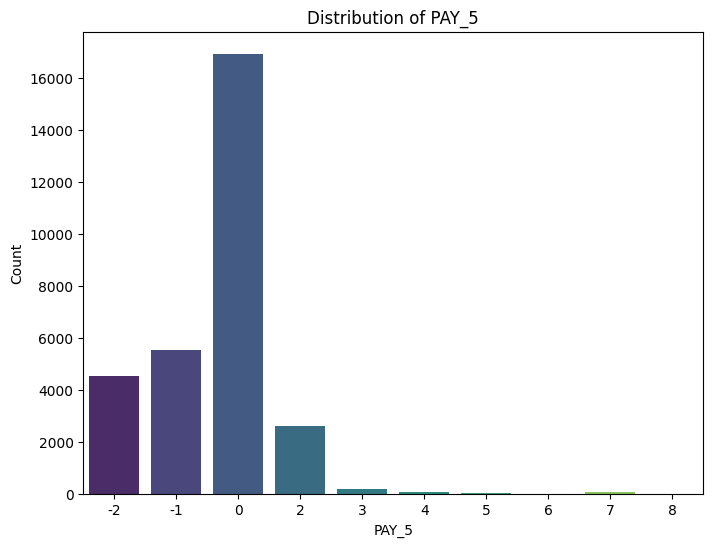

<ipython-input-13-87c3b9a5fb14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


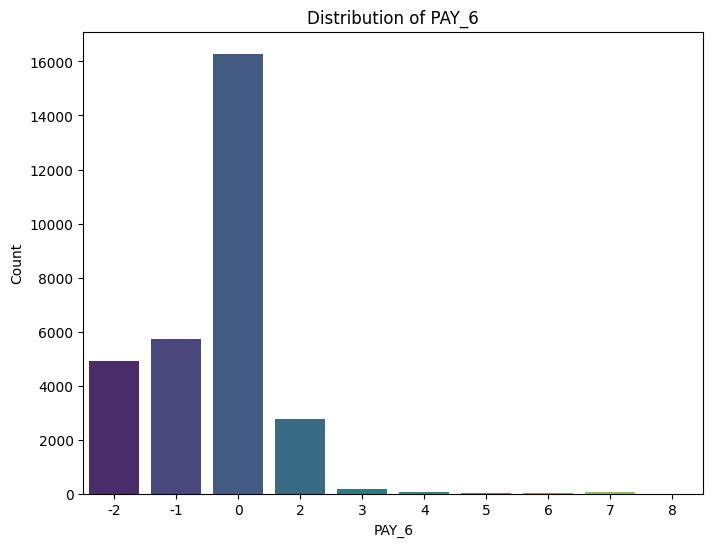

In [13]:
pay_status_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_status_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Default vs. Non-Default:

<ipython-input-14-03cf2b5fa9af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default.payment.next.month', data=df, palette='Set1')


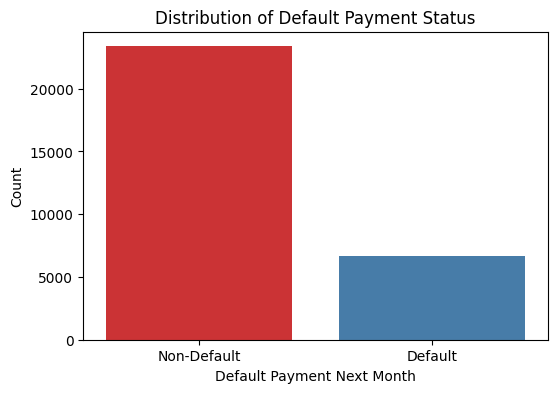

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='default.payment.next.month', data=df, palette='Set1')
plt.title("Distribution of Default Payment Status")
plt.xlabel("Default Payment Next Month")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'])
plt.show()

## Age Distribution by Default Status:

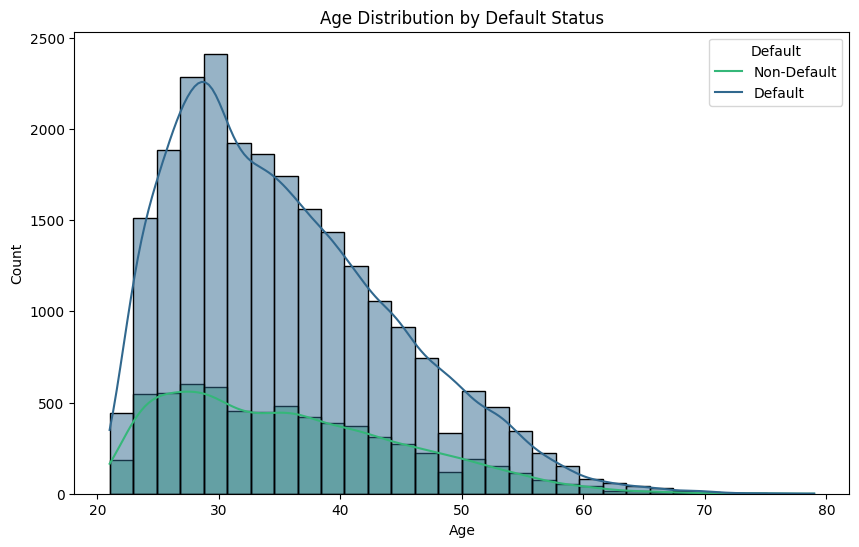

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x='AGE', data=df, hue='default.payment.next.month', bins=30, kde=True, palette='viridis')
plt.title("Age Distribution by Default Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.show()

- It seems that the highest number of default cases were recorded for individuals around the age of 30.
- After reaching the age range of 30-35, the number of default cases seems to decrease as the age increases.

# **Data Preprocessing**


## Checking for Outliers:
I will employ two methods to check for outliers in the dataset:
- Box plot
- Z-score


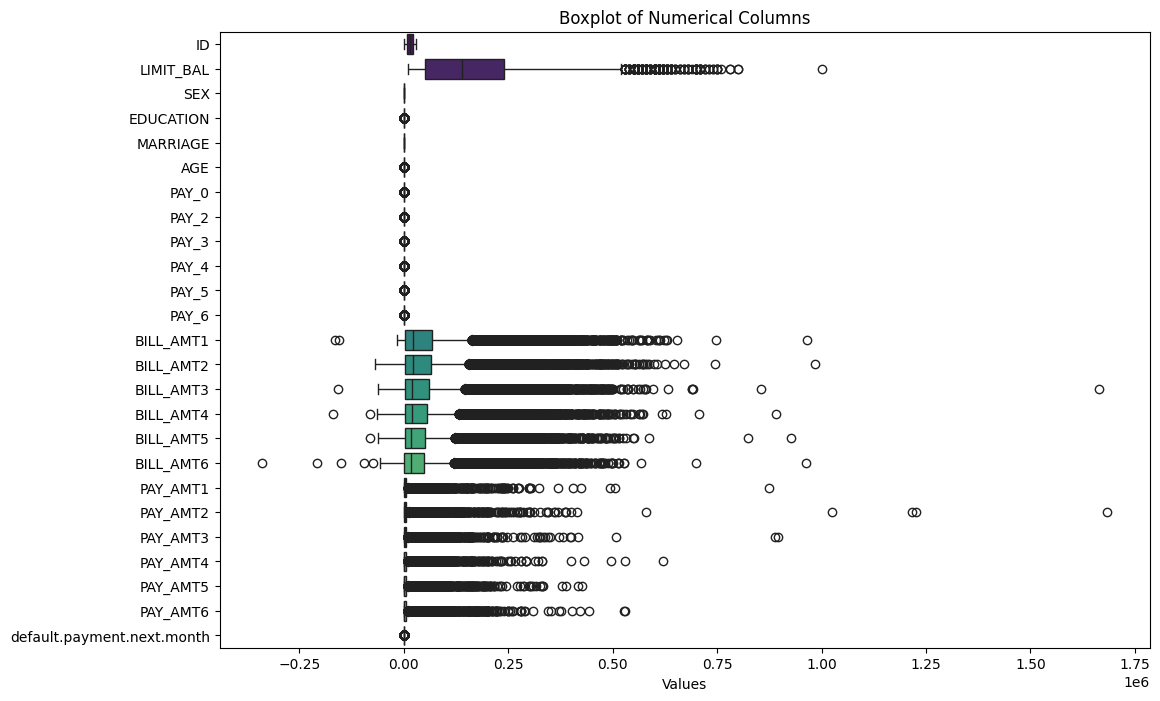

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h', palette='viridis')
plt.title("Boxplot of Numerical Columns")
plt.xlabel("Values")
plt.show()

In [17]:
# Z-scores for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['int64', 'float64']))

# Absolute Z-scores
abs_z_scores = np.abs(z_scores)

# Threshold for identifying outliers (e.g., z-score > 3)
threshold = 3

# Get boolean array indicating outliers
outliers = (abs_z_scores > threshold).any(axis=1)

# Rows with outliers
outliers_df = df[outliers]

print("Number of outliers:", outliers_df.shape[0])
print(outliers_df.head())

Number of outliers: 3571
    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
6    7   500000.0    1          1         2   29      0      0      0      0   
12  13   630000.0    2          2         2   41     -1      0     -1     -1   
17  18   320000.0    1          1         1   49      0      0      0     -1   
33  34   500000.0    2          2         1   54     -2     -2     -2     -2   
40  41   360000.0    1          1         2   33      0      0      0      0   

    ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
6   ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   
12  ...     6500.0     6500.0     2870.0    1000.0    6500.0    6500.0   
17  ...    70074.0     5856.0   195599.0   10358.0   10000.0   75940.0   
33  ...     7521.0    71439.0     8981.0    4152.0   22827.0    7521.0   
40  ...   628699.0   195969.0   179224.0   10000.0    7000.0    6000.0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment

# Note:

- It can be worthwhile to identify and handle outliers in a dataset, especially in a machine learning project.

- Domain knowledge and understanding the context of our data is crucial in determining the best approach to dealing with outliers.

- In the context of credit card default prediction, outliers can represent high-risk individuals or transactions. Ignoring these outliers could result in the model failing to adequately identify these cases, which is crucial in risk assessment.

- So, In this case **I have decided to not remove the outliers**.

# **Feature Engineering**

## 1. Credit Utilization Ratio:
- The Credit Utilization Ratio is the ratio of the credit card balance to the credit limit.
- It is created by dividing the current credit card balance (BILL_AMT1) by the credit limit (LIMIT_BAL). This gives the proportion of the credit limit being used.

In [18]:
# Credit Utilization Ratio
df['Credit_Utilization_Ratio'] = df['BILL_AMT1'] / df['LIMIT_BAL']

## 2. Age Groups:

- Grouping ages into categories such as young, middle-aged, and senior.

In [19]:
# Age Groups
bins = [20, 35, 50, 100]  # Define age group bins (e.g., young, middle-aged, senior)
labels = ['Young', 'Middle-Aged', 'Senior']  # Labels for age groups

df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

## 3. Payment Status Trends:
- Creating features to capture trends in payment status over months. For this example, we'll calculate the average change in payment status over the last 3 months.

In [20]:
# Payment Status Trends
payment_status_columns = ['PAY_0', 'PAY_2', 'PAY_3']

# Calculate average change in payment status over the last 3 months
df['Payment_Trend'] = df[payment_status_columns].mean(axis=1)

## Impromtu EDA for the newly created features

<ipython-input-21-7e3c2922ff81>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age_Group', y='Credit_Utilization_Ratio', data=avg_credit_utilization, palette='viridis')
<ipython-input-21-7e3c2922ff81>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


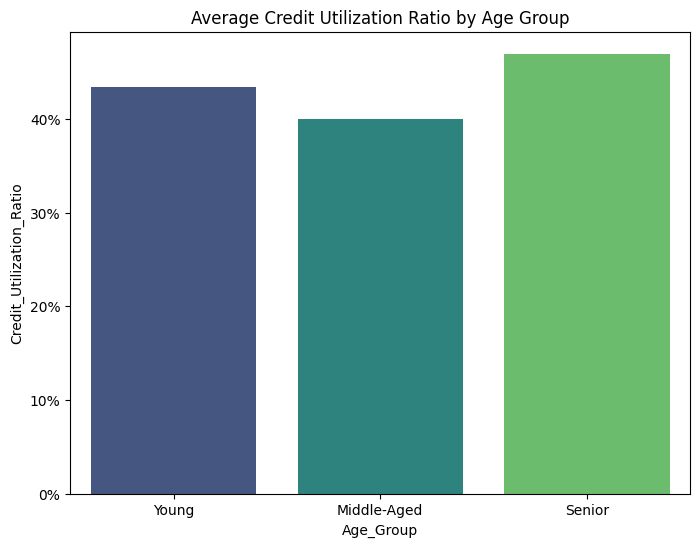

In [21]:
# The average Credit Utilization Ratio and Payment Trend for each Age Group
avg_credit_utilization = df.groupby('Age_Group')['Credit_Utilization_Ratio'].mean().reset_index()
avg_payment_trend = df.groupby('Age_Group')['Payment_Trend'].mean().reset_index()

# Barplots for the same
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Age_Group', y='Credit_Utilization_Ratio', data=avg_credit_utilization, palette='viridis')
plt.title('Average Credit Utilization Ratio by Age Group')

# Format y-axis ticks as percentage
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

plt.show()

<ipython-input-22-97428bbb59fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Payment_Trend', data=avg_payment_trend,palette='magma')


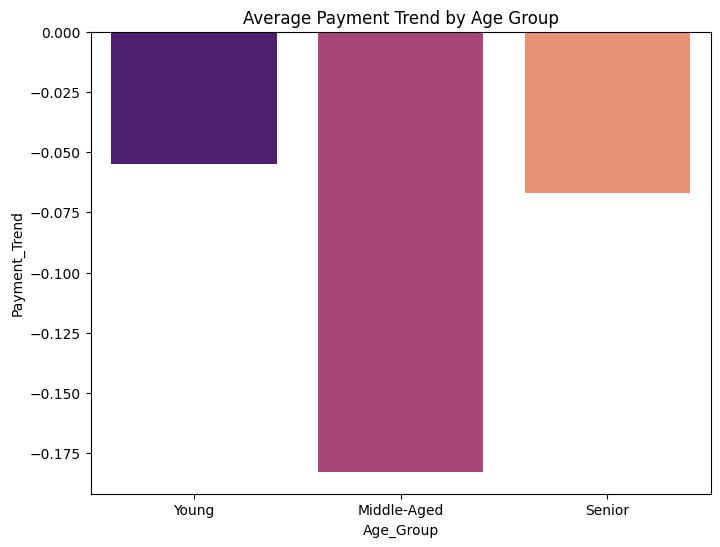

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Payment_Trend', data=avg_payment_trend,palette='magma')
plt.title('Average Payment Trend by Age Group')
plt.show()

**Key Observations**:

- A negative average payment trend indicates that, on average, the payment status for the previous months has been worsening over time for all age groups. This means that, on average, customers are paying their bills later or less than before.
- The middle-aged group has a higher average negative payment trend compared to other age groups. This indicates that, on average, customers in the middle-aged group are experiencing a more pronounced worsening in their payment behavior over time.

In [23]:
print(df[['Credit_Utilization_Ratio', 'Age_Group', 'Payment_Trend']].head())

   Credit_Utilization_Ratio    Age_Group  Payment_Trend
0                  0.195650        Young       1.000000
1                  0.022350        Young       0.333333
2                  0.324878        Young       0.000000
3                  0.939800  Middle-Aged       0.000000
4                  0.172340       Senior      -0.666667


In [24]:
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  ...       0.0     689.0       0.0       0.0       0.0       0.0   
1  ...       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2  ...    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3  ...    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4  ...    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  Credit_Utilization_Ratio    Age_Group  \
0                           1   

## Encoding

In [25]:
# Check data types of columns
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  ...       0.0     689.0       0.0       0.0       0.0       0.0   
1  ...       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2  ...    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3  ...    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4  ...    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  Credit_Utilization_Ratio    Age_Group  \
0                           1   

In [26]:
print(df['Age_Group'])

0              Young
1              Young
2              Young
3        Middle-Aged
4             Senior
            ...     
29995    Middle-Aged
29996    Middle-Aged
29997    Middle-Aged
29998    Middle-Aged
29999    Middle-Aged
Name: Age_Group, Length: 30000, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Senior']


In [27]:
# Perform one-hot encoding for 'Age_Group'
df_encoded = pd.get_dummies(df, columns=['Age_Group'], drop_first=False)

# Check the new DataFrame with one-hot encoded 'Age_Group'
print(df_encoded.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  \
0  ...       0.0       0.0       0.0       0.0                           1   
1  ...    1000.0    1000.0       0.0    2000.0                           1   
2  ...    1000.0    1000.0    1000.0    5000.0                           0   
3  ...    1200.0    1100.0    1069.0    1000.0                           0   
4  ...   10000.0    9000.0     689.0     679.0                           0   

   Credit_Utilization_Ratio  Payment_Trend  Age_Group_Yo

In [28]:
# Check the data types of columns in X_train
print(df_encoded.dtypes)

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
Credit_Utilization_Ratio      float64
Payment_Tren

## The intention behind the use of Variance Inflation Factor (VIF) in statistical modeling assess and manage multicollinearity issues.
- VIF helps to identify which predictor variables are highly correlated with each other.
- It provides a quantitative measure of the extent to which multicollinearity is present in the model.
- Higher VIF values indicate stronger multicollinearity, which means the coefficients become less stable and more difficult to interpret.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

# Display the VIF DataFrame
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Feature        VIF
0                           ID   1.014722
1                    LIMIT_BAL   2.294264
2                          SEX   1.028023
3                    EDUCATION   1.132642
4                     MARRIAGE   1.268476
5                          AGE   6.132413
6                        PAY_0        inf
7                        PAY_2        inf
8                        PAY_3        inf
9                        PAY_4   4.293865
10                       PAY_5   4.730034
11                       PAY_6   3.257684
12                   BILL_AMT1  15.581255
13                   BILL_AMT2  25.877136
14                   BILL_AMT3  21.781759
15                   BILL_AMT4  20.453788
16                   BILL_AMT5  25.078538
17                   BILL_AMT6  15.040492
18                    PAY_AMT1   1.709204
19                    PAY_AMT2   2.238666
20                    PAY_AMT3   1.757264
21                    PAY_AMT4   1.652477
22                    PAY_AMT5   1

## Interpretation:
The table shows the VIF values for each feature.
- A VIF value of 1 indicates no multicollinearity.
- Generally, a VIF above 5 or 10 indicates multicollinearity.
- Features with high VIF values (e.g., >5) may need further investigation or could be candidates for removal to reduce multicollinearity.
- In this case, I have decided to remove some of these features from the dataset.
- Features like Pay_0, Pay_1, Pay_3 were not removed as they will be required as inputs for the webapp.

In [30]:
df_encoded.drop(['ID','Age_Group_Middle-Aged', 'Age_Group_Senior', 'Age_Group_Young', 'Payment_Trend'], axis=1, inplace=True)

In [31]:
print(df_encoded.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'Credit_Utilization_Ratio'],
      dtype='object')


In [32]:
print(df_encoded.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -2  ...        0.0        0.0       0.0     689.0       0.0       0.0   
1      0  ...     3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2      0  ...    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3      0  ...    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4      0  ...    19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  Credit_Utilization_Rati

# Model Training:

## Train-Test Split:

In [33]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(['default.payment.next.month', ], axis=1)
y = df['default.payment.next.month']

# Perform train-test split with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (24000, 24)
X_test shape: (6000, 24)
y_train shape: (24000,)
y_test shape: (6000,)


In [34]:
print(X_train.isnull().sum())

LIMIT_BAL                   0
SEX                         0
EDUCATION                   0
MARRIAGE                    0
AGE                         0
PAY_0                       0
PAY_2                       0
PAY_3                       0
PAY_4                       0
PAY_5                       0
PAY_6                       0
BILL_AMT1                   0
BILL_AMT2                   0
BILL_AMT3                   0
BILL_AMT4                   0
BILL_AMT5                   0
BILL_AMT6                   0
PAY_AMT1                    0
PAY_AMT2                    0
PAY_AMT3                    0
PAY_AMT4                    0
PAY_AMT5                    0
PAY_AMT6                    0
Credit_Utilization_Ratio    0
dtype: int64


# 1. Random Forest:

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# model Initialization
rf_model = RandomForestClassifier(random_state=42)

# Training
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [36]:
# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



## Interpretation:
- The model performs better at predicting non-default cases (class 0) than default cases (class 1), as seen from higher precision, recall, and F1-score for class 0.
- The high precision for class 0 (0.84) indicates that when the model predicts a non-default, it is correct 84% of the time.
- The lower recall for class 1 (0.36) suggests that the model misses many actual default cases, capturing only 36% of them.
- The F1-score is a harmonic mean of precision and recall, providing a balance between the two. The weighted average F1-score is 0.80, indicating overall decent performance.
- The accuracy of 0.82 means the model correctly predicts 82% of the cases overall.

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8153333333333334


## The model correctly predicts the default status of credit card users 81.53% of the time.

[[4421  266]
 [ 842  471]]


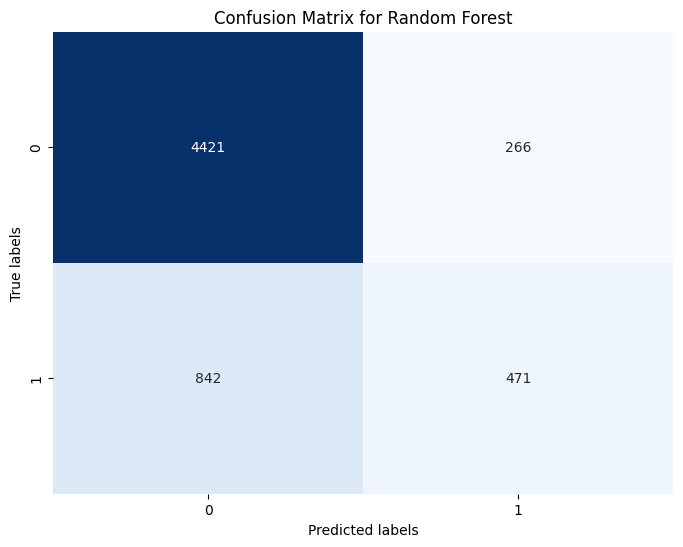

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

## Interpretation:
Looking at the confusion matrix, we can see that the model has:
1. Correctly predicted 4421 non-default cases (True Negatives).
2. Incorrectly predicted 266 non-default cases as defaults (False Positives).
3. Incorrectly predicted 842 default cases as non-default (False Negatives).
4. Correctly predicted 471 default cases (True Positives).

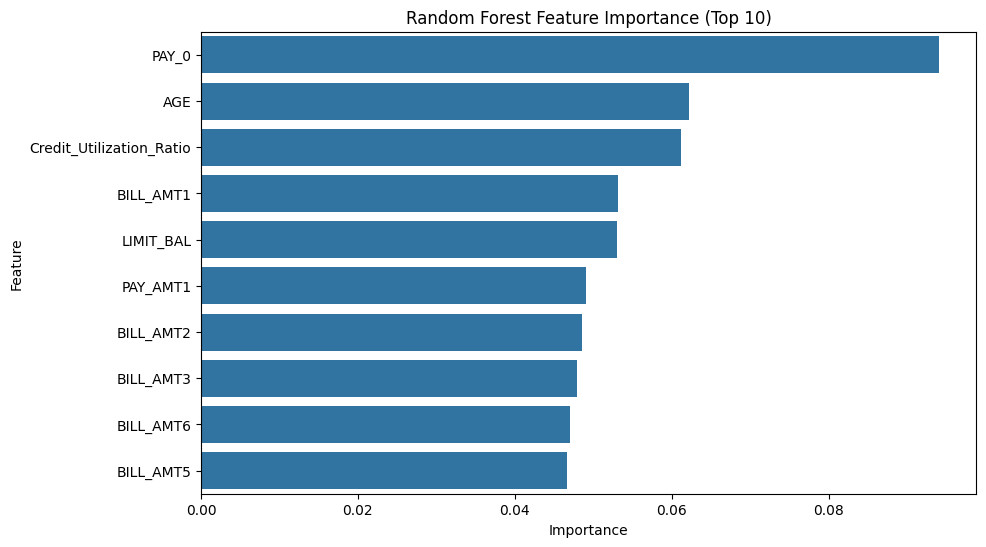

In [39]:
# Random Forest Feature Importance
feature_importance_rf = rf_model.feature_importances_

# DataFrame to display feature importances
df_feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_rf})
df_feature_importance_rf = df_feature_importance_rf.sort_values(by='Importance', ascending=False)

# Feature importances Plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance_rf[:10])
plt.title('Random Forest Feature Importance (Top 10)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [40]:
#import joblib

#joblib.dump(rf_model, 'rf_model.pkl')

# 2. LightGBM:

In [41]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3519
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256


In [42]:
report_lgb = classification_report(y_test, y_pred_lgb)
print("Classification Report:\n", report_lgb)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("Accuracy:", accuracy_lgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.8188333333333333


## Interpretation:
The LightGBM model provides slightly better performance compared to the Random Forest model, with an accuracy of 81.88%.
- The model shows a good precision for class 0 (non-default) at 0.84, indicating that when it predicts non-default, it is correct 84% of the time.
- However, the precision for class 1 (default) is lower at 0.66, meaning the model's ability to correctly predict defaults is moderate.
- Recall for class 1 (default) is 0.36, indicating that the model is capturing only 36% of actual defaults.
- The F1-score for class 1 is 0.46, representing a balance between precision and recall for defaults.

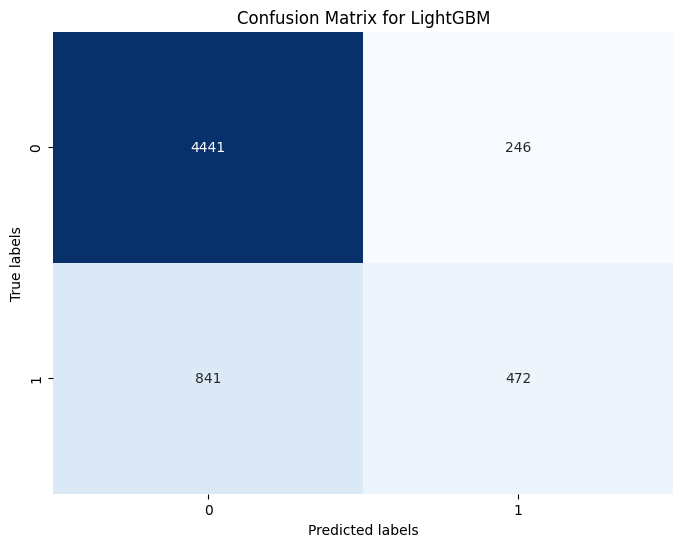

In [43]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for LightGBM')
plt.show()

## Interpretation:
The confusion matrix shows:
- **4441** instances of non-defaults correctly predicted (True Negatives)
- **246** instances of non-defaults incorrectly predicted as defaults (False Positives)
- **841** instances of defaults incorrectly predicted as non-defaults (False Negatives)
- **472** instances of defaults correctly predicted (True Positives)

In [44]:
#import joblib

#joblib.dump(lgb_model, 'lgb.pkl')

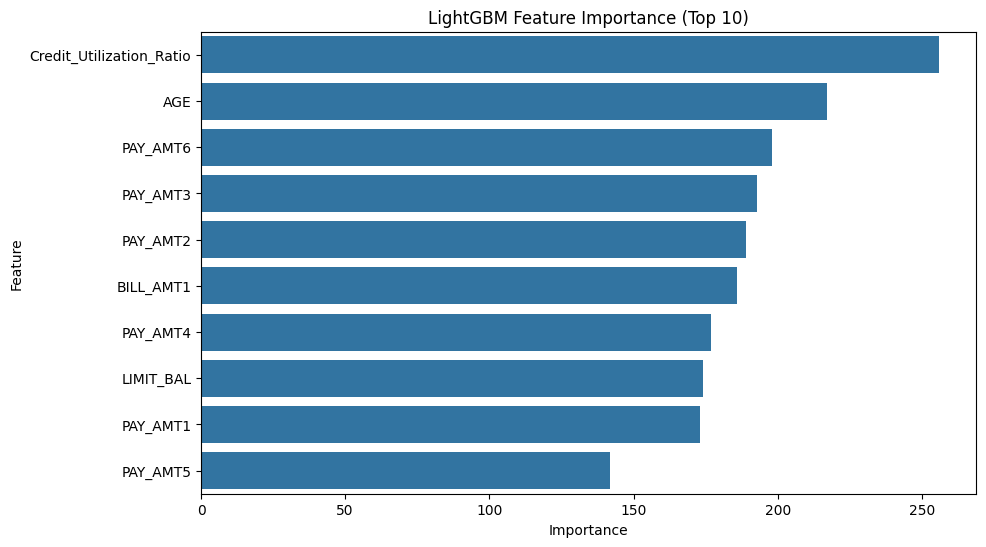

In [45]:
# LightGBM Feature Importance
feature_importance_lgbm = lgb_model.feature_importances_

# DataFrame to display feature importances
df_feature_importance_lgbm = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_lgbm})
df_feature_importance_lgbm = df_feature_importance_lgbm.sort_values(by='Importance', ascending=False)

# Feature importances Plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance_lgbm[:10])
plt.title('LightGBM Feature Importance (Top 10)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 3. XGBoost Classifier:

In [46]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.8165
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix:
[[4417  270]
 [ 831  482]]


## Interpretation:
The XGBoost model shows:
- A relatively high overall accuracy of 81.65%.
- A good precision for class 0 (non-default), indicating that the model is correct in predicting non-defaults 84% of the time.
- A moderate precision for class 1 (default), with the model correctly predicting defaults 64% of the time.
- The recall (sensitivity) for class 0 is high (94%), indicating the model is good at capturing actual non-default cases.
- The recall for class 1 (default) is lower at 37%, meaning the model missed some of the actual defaults.

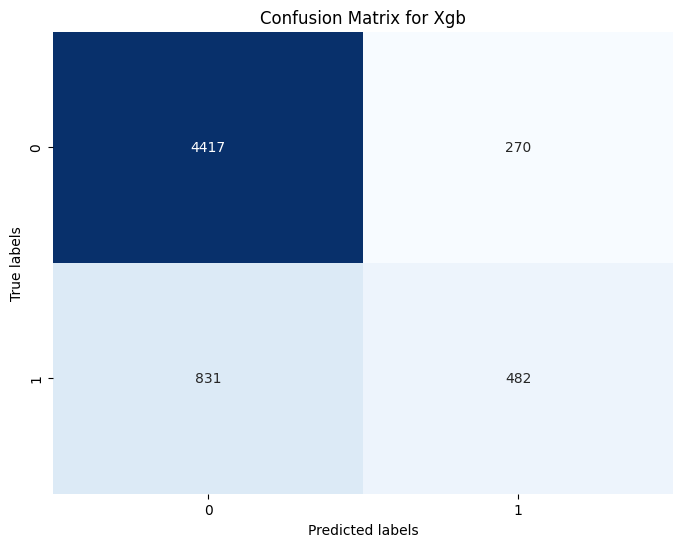

In [47]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Xgb')
plt.show()

## Interpretation:
The confusion matrix shows:
- **4417** true negatives (actual non-defaults correctly predicted as non-defaults).
- **270** false positives (actual non-defaults incorrectly predicted as defaults).
- **831** false negatives (actual defaults incorrectly predicted as non-defaults).
- **482** true positives (actual defaults correctly predicted as defaults).

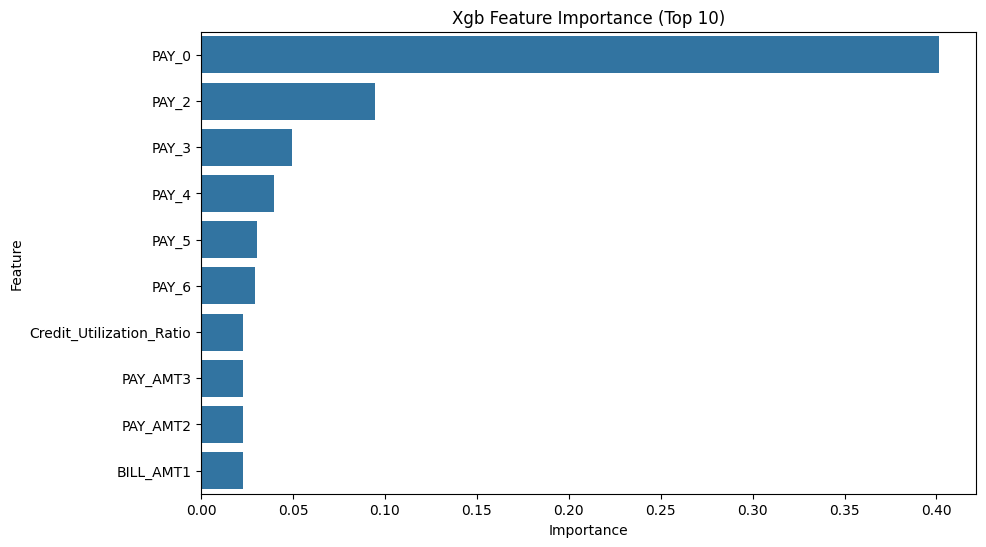

In [48]:
feature_importance_xgb = xgb.feature_importances_

# DataFrame to display feature importances
df_feature_importance_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_xgb})
df_feature_importance_xgb = df_feature_importance_xgb.sort_values(by='Importance', ascending=False)

# Feature importances Plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance_xgb[:10])
plt.title('Xgb Feature Importance (Top 10)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [49]:
#import joblib

#joblib.dump(xgb, 'xgb.pkl')

## About Model performance:

All three models performed well with higher accuracy, precision, and recall for non-default cases.
There is room for improvement in predicting default cases (class 1), as indicated by the lower recall and precision compared to non-default cases.


# Model Evaluation:

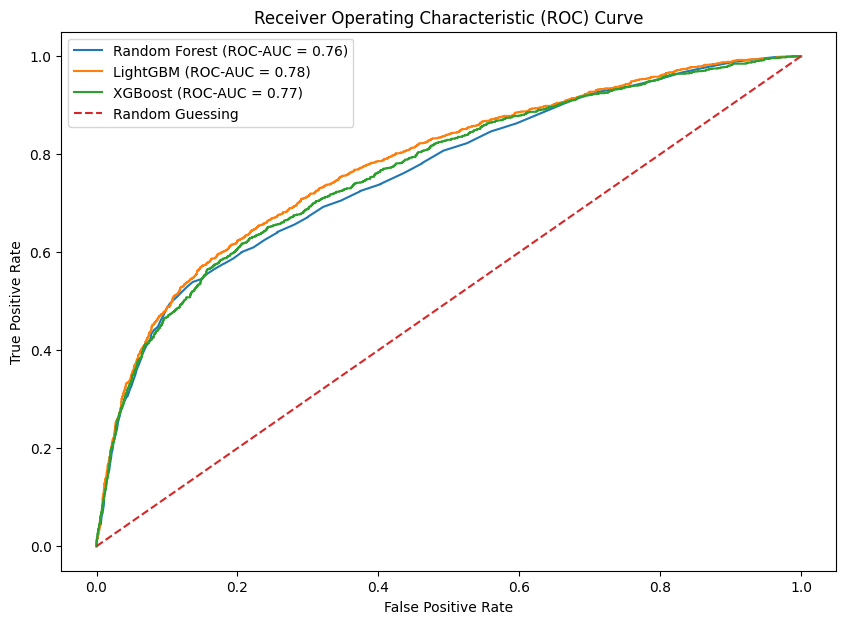

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import cross_val_score

# Initialize the models (assuming you've already trained them)
models = [rf_model, lgb_model, xgb]  # rf, lgbm, and xgb are the trained models

# Initialize lists to store results
model_names = ['Random Forest', 'LightGBM', 'XGBoost']
roc_auc_scores = []
avg_precision_scores = []

# ROC curve
plt.figure(figsize=(10, 7))

for model, name in zip(models, model_names):
    # ROC-AUC Score
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores.append(roc_auc)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = auc(recall, precision)
    avg_precision_scores.append(avg_precision)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')

# ROC curve Plot:
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


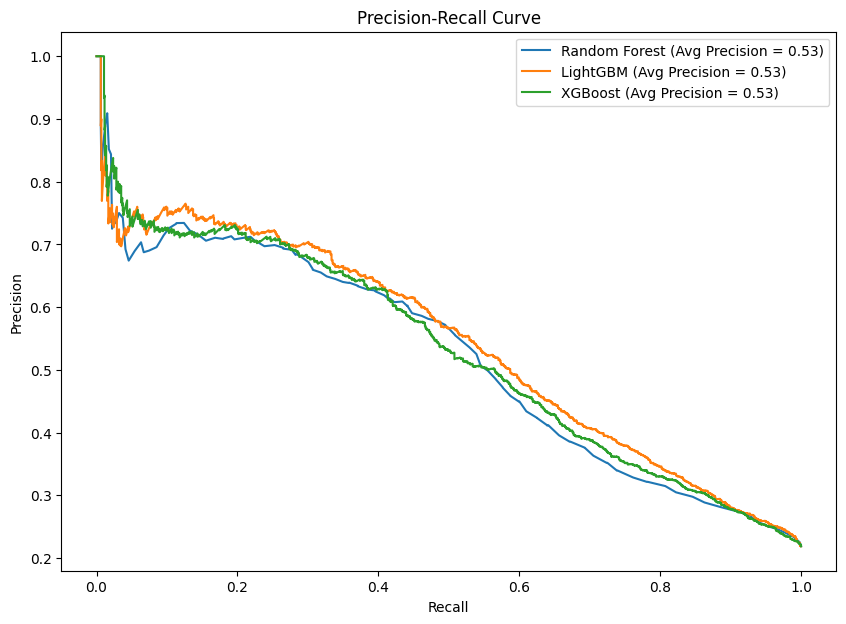

In [51]:
# Plotting our Precision-Recall Curve
plt.figure(figsize=(10, 7))
for model, name in zip(models, model_names):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label=f'{name} (Avg Precision = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## How to Interpret ROC Curve and Precision-Recall Curve:
1. **ROC Curve**:

- The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different classification thresholds.
- It shows the trade-off between sensitivity (recall) and specificity.
- A curve closer to the top-left corner indicates a better model.
- The area under the ROC curve (ROC-AUC) summarizes the curve's performance, with higher values indicating better discrimination.

2. **Precision-Recall Curve**:

- The Precision-Recall curve plots Precision against Recall for different classification thresholds.
- It illustrates the trade-off between precision (positive predictive value) and recall (sensitivity).
- A curve closer to the top-right corner indicates a better model.
- The area under the Precision-Recall curve (Avg Precision) summarizes the curve's performance, with higher values indicating better precision-recall trade-off.

In [52]:
# Cross-validation
cv_results = []
for model, name in zip(models, model_names):
    cv_score = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    cv_results.append(cv_score)

# The Cross-validation Results
print("Cross-validation Results:")
for name, scores in zip(model_names, cv_results):
    print(f"{name}: Mean ROC-AUC = {scores.mean():.4f}, Std = {scores.std():.4f}")

[LightGBM] [Info] Number of positive: 5308, number of negative: 18692
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3519
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221167 -> initscore=-1.258881
[LightGBM] [Info] Start training from score -1.258881
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3516
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 24
[LightGBM] [Info] [b

## What do these results mean?
Mean ROC-AUC Scores:

1. **Random Forest**:

- Mean ROC-AUC = 0.7643
- Standard Deviation (Std) = 0.0180
- The Random Forest model has a mean ROC-AUC score of 0.7643, indicating that on average, it can distinguish between positive and negative classes with a decent degree of accuracy.
- The standard deviation (Std) of 0.0180 suggests that the model's performance is relatively consistent across different cross-validation folds.
- While slightly lower than LightGBM, the Random Forest model shows decent performance in classifying credit card defaults.

2. **LightGBM**:

- Mean ROC-AUC = 0.7820
- Std = 0.0190
- The LightGBM model has a mean ROC-AUC score of 0.7820, which is highest among the three models.
- The standard deviation (Std) of 0.190 indicates consistent performance across cross-validation folds.
- LightGBM demonstrates good discrimination between positive and negative classes.

3. **XGBoost**:

- Mean ROC-AUC = 0.7639
- Std = 0.0198
- The XGBoost model has the lowest mean ROC-AUC score among the three models, with a value of 0.7639.
- The higher standard deviation (Std) of 0.0198 suggests more variability in performance across different folds compared to the other models.
- XGBoost, while having a lower mean ROC-AUC, still performs reasonably well in classifying credit card defaults.

# **Business Interpretation**:

Actionable Insights:

- The **LightGBM model** shows the highest mean ROC-AUC score among the three models (0.7820), indicating **strong discrimination** between customers who are likely to default and those who are not.
- This model can be utilized as a valuable tool for risk assessment in credit card lending.
- Business stakeholders can use the LightGBM predictions to identify high-risk customers who are more likely to default on their credit card payments.
- Strategies such as targeted communication, personalized credit limit adjustments, or offering financial counseling can be implemented for high-risk customers to mitigate default risks.